In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, losses, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os

data = "/content/gdrive/MyDrive/Colab Notebooks/Hackathon Data"
labels = os.listdir(data)

print(len(labels))

11


In [5]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/Hackathon Data"
val_path = "/content/gdrive/MyDrive/Colab Notebooks/Test Data"

In [6]:
shear = 0.1
rotat = 60
w_shift = 0.4
h_shift = 0.4
zoom = 0.2

In [7]:
train_batches = ImageDataGenerator(zoom_range=zoom, rotation_range=rotat, shear_range=shear, 
width_shift_range=w_shift, height_shift_range=h_shift, horizontal_flip=True, fill_mode='nearest', 
preprocessing_function=tf.keras.applications.resnet50.preprocess_input, rescale=1/255)\
.flow_from_directory(directory=train_path, target_size=(224, 224), classes=labels, batch_size=10)

val_batches = ImageDataGenerator(zoom_range=zoom, rotation_range=rotat, shear_range=shear, 
width_shift_range=w_shift, height_shift_range=h_shift, horizontal_flip=True, fill_mode='nearest', 
preprocessing_function=tf.keras.applications.resnet50.preprocess_input,  rescale=1/255)\
.flow_from_directory(directory=val_path, target_size=(224, 224), classes=labels, batch_size=10)

Found 6342 images belonging to 11 classes.
Found 520 images belonging to 11 classes.


In [8]:
img, labels = next(train_batches)

In [9]:
def plt_imgs(img_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

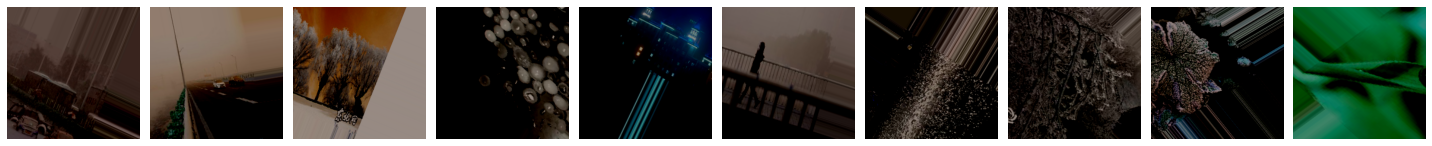

In [10]:
plt_imgs(img)

In [11]:
print(labels)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


In [13]:
base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
  layer.trainable=False

94683136/94668760 [==============================] - 1s 0us/step


In [15]:
# x = layers.Flatten()(base_model.output)

# x = layers.Dense(512, activation='relu')(x)
# predictions = layers.Dense(4, activation = 'softmax')(x)

# 

x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.Dense(100, activation='relu')(x)

x = tf.keras.layers.Dense(100, activation='relu')(x)

x = tf.keras.layers.Dense(100, activation='relu')(x)

# x = tf.keras.layers.Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# # x = tf.keras.layers.Dense(100, activation='relu')(x)
# # x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
# x = tf.keras.layers.Dense(100, activation='relu')(x)

predictions = tf.keras.layers.Dense(11, activation='softmax')(x)


full_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
full_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [16]:
from tensorflow.python.eager.def_function import functions_run_eagerly
# head_model = Model(inputs = base_model.input, outputs = predictions)
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["sparse_categorical_accuracy"])
full_model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkp = ModelCheckpoint('weather_model.h5', monitor='val_accuracy', min_delta=0, mode='max', patience=0, verbose=1, save_best_only=True)
# early_s = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=0,  verbose=1, min_delta=0.0001)

callback = [checkp]

In [18]:
epoch = 50
hist = full_model.fit(x=train_batches, validation_data=val_batches, callbacks=callback, verbose=1, epochs= epoch, batch_size=10)

Epoch 1/50
635/635 [==============================] - ETA: 0s - loss: 1.7542 - accuracy: 0.5481
Epoch 1: val_accuracy improved from -inf to 0.60192, saving model to weather_model.h5
635/635 [==============================] - 2074s 3s/step - loss: 1.7542 - accuracy: 0.5481 - val_loss: 1.2734 - val_accuracy: 0.6019
Epoch 2/50
635/635 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.6757
Epoch 2: val_accuracy improved from 0.60192 to 0.64038, saving model to weather_model.h5
635/635 [==============================] - 123s 193ms/step - loss: 1.0476 - accuracy: 0.6757 - val_loss: 1.0833 - val_accuracy: 0.6404
Epoch 3/50
635/635 [==============================] - ETA: 0s - loss: 0.8757 - accuracy: 0.7159
Epoch 3: val_accuracy improved from 0.64038 to 0.71923, saving model to weather_model.h5
635/635 [==============================] - 121s 191ms/step - loss: 0.8757 - accuracy: 0.7159 - val_loss: 0.8995 - val_accuracy: 0.7192
Epoch 4/50
635/635 [=========================

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

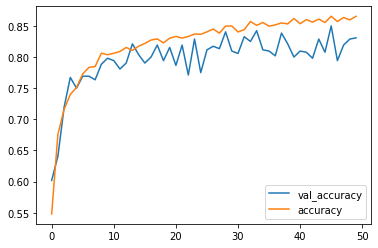

In [20]:
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["accuracy"])
plt.legend(['val_accuracy', 'accuracy'])

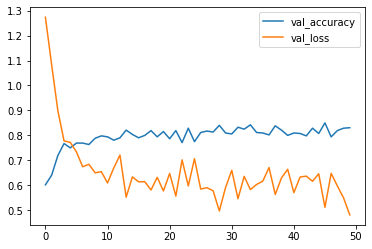

In [25]:
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["val_loss"])
plt.legend(['val_accuracy', 'val_loss'])

In [21]:
val_batches.class_indices


{'dew': 0,
 'fogsmog': 1,
 'frost': 2,
 'glaze': 3,
 'hail': 4,
 'lightning': 5,
 'rain': 6,
 'rainbow': 7,
 'rime': 8,
 'sandstorm': 9,
 'snow': 10}

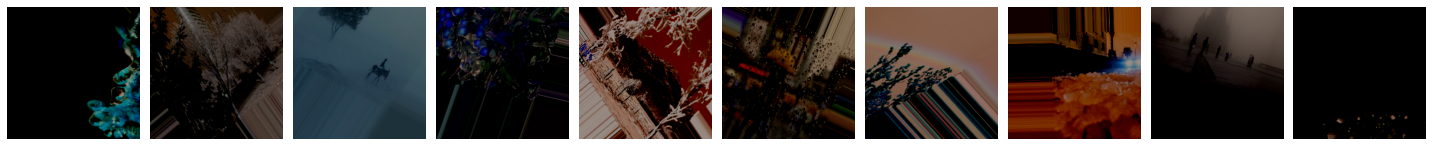

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
t_imgs, t_label = next(val_batches)
plt_imgs(t_imgs)
print(t_label)

In [23]:
import numpy as np
predictions = full_model.predict(x=val_batches, verbose=0)
print(np.round(predictions))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


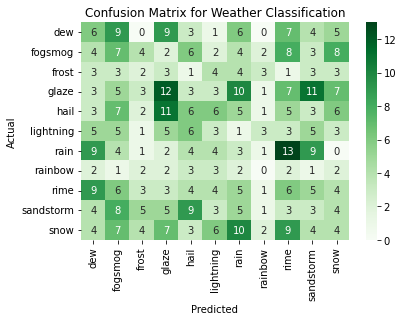

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 

tick_labels = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow'] 
cm = confusion_matrix(y_true=val_batches.classes, y_pred=np.argmax(predictions, axis=-1))
sn.heatmap(cm, annot=True, cmap="Greens", xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Confusion Matrix for Weather Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()